In [1]:
import numpy as np
def Q(d,k):
    if(k<=1 or k<2*d or k>6*d):return 0
    if(d==1):
        return 1/5.0
    res = np.array([Q(d-1,k-j) for j in range(2,7)])
    return res.sum() / 5.0

def P(d,k):
    if(k==1): return 1-(5/6)**d
    if((k>=2 and k<=2*d-1) or k>6*d):return 0
    return (5/6)**d*Q(d,k)


In [2]:
print(sum([P(5,d) for d in range(50)]))

0.9999999999999998


In [3]:
N=200
D=10
tab_P = np.zeros((D+1,6*D+1))
for d in range(1,D+1):
    for n in range(1,6*D+1):
        tab_P[d][n] = P(d,n)


In [4]:
def Ep(d):
    return 4*d*((5/6)**d) + 1 - (5/6)**d

In [5]:
tab_E=np.ones((N,N,2))*-2
def EG(i,j,D,N,E):
    if i >= N:
        return 1,0
    if j >= N:
        return -1,0
    if(E[i,j][0]!=-2):return E[i,j]
    res_max=-10000
    d_opt=0
    for d in range(1,D+1):
        cum = 0
        for k in range(1,6*d+1):
            if(i+k>=N):
                cum += tab_P[d,k] * -1
            else:
                if(E[j,i+k][0]==-2):
                    E[j,i+k]=EG(j,i+k,D,N,E)
                cum += tab_P[d,k] * E[j,i+k][0]
        if(res_max<-cum):
            res_max=-cum
            d_opt=d
    E[i,j]=res_max,d_opt
    return E[i,j]
    
    
        
        

In [6]:
[EG(i,j,D,N,tab_E) for i in range(N) for j in range(N)]

[array([0.04802264, 6.        ]),
 array([0.03718702, 6.        ]),
 array([0.02631812, 6.        ]),
 array([0.0154181, 6.       ]),
 array([4.48911489e-03, 6.00000000e+00]),
 array([-0.00646666,  6.        ]),
 array([-0.01744701,  6.        ]),
 array([-0.0284498,  6.       ]),
 array([-0.03947304,  6.        ]),
 array([-0.05051483,  6.        ]),
 array([-0.06157342,  6.        ]),
 array([-0.07264716,  6.        ]),
 array([-0.08373453,  6.        ]),
 array([-0.09483404,  6.        ]),
 array([-0.10594426,  6.        ]),
 array([-0.11706377,  6.        ]),
 array([-0.12819114,  6.        ]),
 array([-0.13932483,  6.        ]),
 array([-0.15046316,  6.        ]),
 array([-0.16160428,  6.        ]),
 array([-0.17274609,  6.        ]),
 array([-0.18388615,  6.        ]),
 array([-0.1950217,  6.       ]),
 array([-0.20614971,  6.        ]),
 array([-0.21726759,  6.        ]),
 array([-0.2284072,  6.       ]),
 array([-0.23954208,  6.        ]),
 array([-0.25065873,  6.        ]),
 a

In [7]:
tab_E[0,0]

array([0.04802264, 6.        ])

In [8]:
r=np.random.random_sample()
len(np.array([tab_P[3,:i+1].sum() for i in range(1,6*3+1)])-r>0)


18

In [9]:
import math
def strategie_aveugle(i,j,D,N):
    return int(np.argmax(np.array([Ep(x) for x in range(1,D+1)])))

def strategie_optimale(i,j,D,N):
    res=EG(i,j,D,N,tab_E)
    return int(res[1])

def strategie_aleatoire(i,j,D,N):
    return math.ceil(np.random.random_sample()*D)

def calcule_points(d):
    if d == 0: return 0
    res=0
    for i in range(d):
        r=np.random.random_sample()
        p=math.ceil(r*100/16.6666667)
        if(p==1):
            return p
        else:
            res+=p
    return res

In [10]:
def jouer(D,N,s1,s2,nb):
    g1=0
    g2=0
    for t in range(nb):
        i=0
        j=0
        while(i<N and j<N):
            if(s1==0):
                di=strategie_aveugle(i,j,D,N)#le nombre de dés lancer par j1
            if(s1==1):
                di=strategie_optimale(i,j,D,N)#le nombre de dés lancer par j1
            if(s1==2):
                di=strategie_aleatoire(i,j,D,N)#le nombre de dés lancer par j1
                
            ki=calcule_points(di)
            
            if(s2==0):
                dj=strategie_aveugle(i,j,D,N)#le nombre de dés lancer par j2
            if(s2==1):
                dj=strategie_optimale(j,i+ki,D,N)#le nombre de dés lancer par j2
            if(s2==2):
                dj=strategie_aleatoire(i,j,D,N)#le nombre de dés lancer par j2
                
            kj=calcule_points(dj)
            
            #print("ki= ",ki, "kj = ",kj)
            i+=ki
            j+=kj
            #print("i= ",i, "j = ",j)
        if(i>=N):
            g1+=1
            g2-=1
        else:
            g1-=1
            g2+=1
    return g1/nb
    

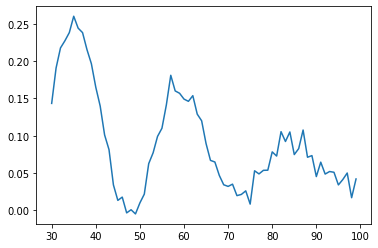

In [203]:
plt.plot([i for i in range(30,N)],[jouer(10,i,0,1,10000) for i in range(30,N)])

In [210]:
import matplotlib.pyplot as plt
def trace(s1,s2,D=10,N=100):
    if(s1==0):
        str1="aveugle"
    if(s1==1):
        str1="optimale"
    if(s1==2):
        str1="aléatoire"
    if(s2==0):
        str2="aveugle"
    if(s2==1):
        str2="optimale"
    if(s2==2):
        str2="aléartoire"
    plt.xlabel("N")
    plt.ylabel("Espériance de gain J1")
    plt.title(str1+" vs "+str2+" N =%d ,D=%d "%(N,D))
    plt.plot([i for i in range(60,N,2)],[jouer(10,i,s1,s2,10000) for i in range(60,N,2)])
    plt.savefig(str1+" vs "+str2+" N =%d ,D=%d "%(N,D))

    plt.show()

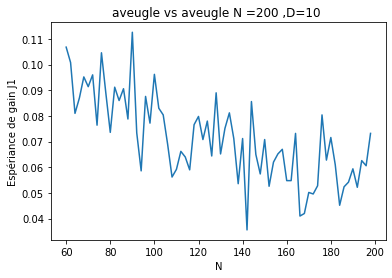

In [218]:
trace(0,0,10,200)

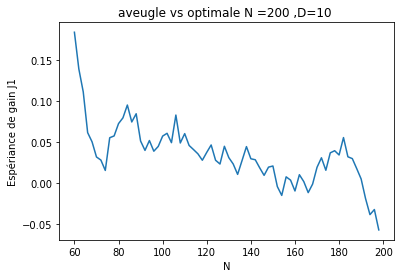

In [219]:
trace(0,1,10,200)


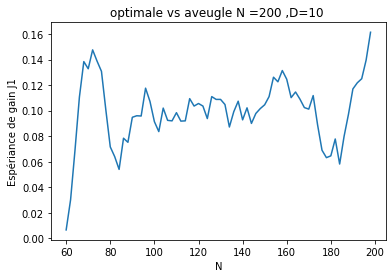

In [217]:
trace(1,0,10,200)

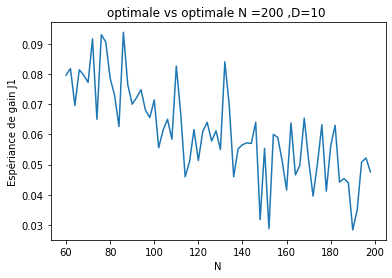

In [216]:
trace(1,1,D=10,N=200)

In [12]:
def EGs(D,N,E):
    for d1 in range(1,D+1):
        for d2 in range(1,D+1):
            if(d1==d2): 
                E[d1,d2]=0
                continue
            esp=0
            for k1 in range(1,6*d1+1):
                for k2 in range(1,6*d2+1):
                    if(k1-k2!=0):
                        esp+=P(d1,k1)*P(d2,k2)*abs(k1-k2)/(k1-k2)
            E[d1,d2]=esp


In [13]:
tab_sim_E=np.zeros((4,4))
EGs(3,N,tab_sim_E)
tab_sim_E[1:,1:]

array([[ 0.        , -0.375     , -0.22685185],
       [ 0.375     ,  0.        , -0.19881687],
       [ 0.22685185,  0.19881687,  0.        ]])

In [14]:
from tkinter import *
from PIL import ImageTk, Image
import os,time
from tkinter import messagebox


In [21]:
def start(v):
    option=Tk()
    mw, mh = option.maxsize()
    option.geometry('360x200+%d+%d'%((mw-360)/2,(mh-200)/2))
    l=Label(option,text="choose the difficulty",font=('Arail',20),bg='yellow',fg="green")
    r1 =Radiobutton(option, text='easy',font=('Arail',15),
                        variable=v, value=0,
                        command=lambda:jouer_interface(option,v))
    r2 =Radiobutton(option, text='medium',font=('Arail',15),
                        variable=v, value=2,
                        command=lambda:jouer_interface(option,v))
    r3 =Radiobutton(option, text='hard',font=('Arail',15),
                        variable=v, value=1,
                        command=lambda:jouer_interface(option,v))
    l.pack()
    r1.pack()
    r2.pack()
    r3.pack()
    
    option.mainloop()

In [35]:
def jouer_interface(o,v):
    o.destroy()
    b1.destroy()
    
    imgJ1 = ImageTk.PhotoImage(Image.open("p1.png").resize((100,100)))
    imgJ2 = ImageTk.PhotoImage(Image.open("p2.png").resize((100,100)))
   
    panel1=Label(root)
    panel2=Label(root)
    panel3=Label(root)
    J1 = Label(panel1, image = imgJ1)
    J2 = Label(panel2, image = imgJ2)
    k1=Label(panel1,text="P1: ",textvariable=v1,font=20,width=20,height=20)
    k2=Label(panel2,text="P2: ",textvariable=v2,font=20,width=20,height=20)
    v1.set(0)
    v2.set(0)
    J1.grid(row=0,column=0)
    k1.grid(row=0,column=1)
    J2.grid(row=0,column=0)
    k2.grid(row=0,column=1)
    b=[]
    for i in range(1,11):    
        b.append(Button(panel3,text=i,font=('Arail',15)))
        b[i-1].grid(row=0,column=i)
    
    b[0]['command']=lambda:point(1,v)
    b[1]['command']=lambda:point(2,v)
    b[2]['command']=lambda:point(3,v)
    b[3]['command']=lambda:point(4,v)
    b[4]['command']=lambda:point(5,v)
    b[5]['command']=lambda:point(6,v)
    b[6]['command']=lambda:point(7,v)
    b[7]['command']=lambda:point(8,v)
    b[8]['command']=lambda:point(9,v)
    b[9]['command']=lambda:point(10,v)
    panel1.grid(row=0,column=0,padx=150)
    panel2.grid(row=2,column=0,padx=150)
    panel3.grid(row=1,column=0,padx=150)
    root.mainloop()
        

In [36]:
def point(i,v):
    
    p1=v1.get()+calcule_points(i)
    
    v1.set(p1)
   
    p2=v2.get()
    if(p1>=N):
        win(0)
    if(v.get()==0):
        p2+=calcule_points(strategie_aveugle(p1,p2,D,N))
    if(v.get()==1):
        p2+=calcule_points(strategie_optimal(p1,p2,D,N))
    if(v.get()==2):
        p2+=calcule_points(strategie_aleatoire(p1,p2,D,N))
    v2.set(p2)
    if(p2>=N):
        win(1)
    

In [37]:
def win(n):
    if(n==0):
        if(messagebox.askretrycancel(message="Vous avez ganger!!! Voulez vous rejouer?")):
            start(var)
        else:
            root.destroy()
    else:
        if(messagebox.askretrycancel(message="Vous avez perdu!!! Voulez vous rejouer?")):
            start(var)
        else:
            root.destroy()


In [220]:
root = Tk()
var=IntVar()
v1=IntVar()
v2=IntVar()
D=10

N=100
mw, mh = root.maxsize()
x=700
y=700
root.geometry('%dx%d+%d+%d'%(x,y,(mw-700)/2,(mh-700)/2))

startimg=Image.open("logo.jpg").resize((50,50),Image.ANTIALIAS)
imgstart = ImageTk.PhotoImage(startimg)
b1=Button(root, image = imgstart,command=lambda:start(var))
b1.pack(pady=225)

root.mainloop()